In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

# Matplotlib settings

In [2]:
%matplotlib inline
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

mpl.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

plt.rcParams['figure.dpi'] = 85
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 4.32
plt.rcParams['ytick.minor.size'] = 2.46
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['xtick.minor.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['ytick.minor.width'] = 1.2

# Load data

In [3]:
data_mode = 'emuPk'
n_rlzs_per_cosmo = 1
tag_emuPk = '_5param' # '_2param' or '_5param'
# this means we decided to be conservative in the error estimation and use a 500 Gpc box 
# even though the Pk is computed for a 1000 Gpc box
tag_errG = f'_boxsize500' 
# nlrzs is the number of draws from the noiseless Pk with the given gaussian error; start with 1
tag_datagen = f'{tag_emuPk}{tag_errG}_nrlzs{n_rlzs_per_cosmo}'
tag_data = '_'+data_mode + tag_datagen


In [4]:
def repeat_arr_rlzs(arr, n_rlzs=1):
    arr_repeat = np.tile(arr, (n_rlzs,1))
    return arr_repeat

def load_data_emuPk(tag_emuPk, tag_errG, tag_datagen, 
                    n_rlzs_per_cosmo=1, return_noiseless=False,
                    mask_negPk=True):

    dir_data = '../data/emuPks'
    fn_emuPk = f'{dir_data}/emuPks{tag_emuPk}.npy'
    fn_emuPkerrG = f'{dir_data}/emuPks_errgaussian{tag_emuPk}{tag_errG}.npy'
    fn_emuPk_noisy = f'{dir_data}/emuPks_noisy{tag_datagen}.npy'
    fn_emuPk_params = f'{dir_data}/emuPks_params{tag_emuPk}.txt'
    fn_emuk = f'{dir_data}/emuPks_k{tag_emuPk}.txt'
    fn_bias_vector = f'{dir_data}/bias_params.txt'
    fn_rands = f'{dir_data}/randints{tag_emuPk}.npy'
        
    Pk = np.load(fn_emuPk_noisy, allow_pickle=True)   
    Pk_noiseless = np.load(fn_emuPk, allow_pickle=True)
    k = np.genfromtxt(fn_emuk)
    bias_vector = np.loadtxt(fn_bias_vector)
    random_ints = np.load(fn_rands, allow_pickle=True)

    theta_noiseless = np.genfromtxt(fn_emuPk_params, delimiter=',', names=True)
    param_names = theta_noiseless.dtype.names
    theta_noiseless = np.array([list(tup) for tup in theta_noiseless]) # from tuples to 2d array
    gaussian_error_pk_noiseless = np.load(fn_emuPkerrG, allow_pickle=True)
    
    theta = repeat_arr_rlzs(theta_noiseless, n_rlzs=n_rlzs_per_cosmo)
    gaussian_error_pk = repeat_arr_rlzs(gaussian_error_pk_noiseless, n_rlzs=n_rlzs_per_cosmo)
    
    if mask_negPk:
        mask = np.all(Pk>0, axis=0)
        Pk = Pk[:,mask]
        Pk_noiseless = Pk_noiseless[:,mask]
        gaussian_error_pk = gaussian_error_pk[:,mask]
        gaussian_error_pk_noiseless = gaussian_error_pk_noiseless[:,mask]
        k = k[mask]
    
    if return_noiseless:
        return theta, Pk, gaussian_error_pk, k, param_names, bias_vector, random_ints, \
               theta_noiseless, Pk_noiseless, gaussian_error_pk_noiseless
    
    else:
        return theta, Pk, gaussian_error_pk, k, param_names, bias_vector, random_ints

In [5]:
theta, Pk, gaussian_error_pk, k, param_names, bias_vector, random_ints, \
               theta_noiseless, Pk_noiseless, gaussian_error_pk_noiseless = load_data_emuPk(tag_emuPk, tag_errG, tag_datagen, 
                                                                                            n_rlzs_per_cosmo=1, 
                                                                                            return_noiseless=True)

In [6]:
print(f"N_data: {Pk.shape[0]}")
print(f"N_dim: {Pk.shape[1]}")
print(f"N_params: {theta.shape[1]}")
print(f"Parameters: {param_names}")

N_data: 1000
N_dim: 26
N_params: 5
Parameters: ('omega_cold', 'sigma8_cold', 'hubble', 'ns', 'omega_baryon')


# Plot a subset of the data

In [7]:
n_plot = 100

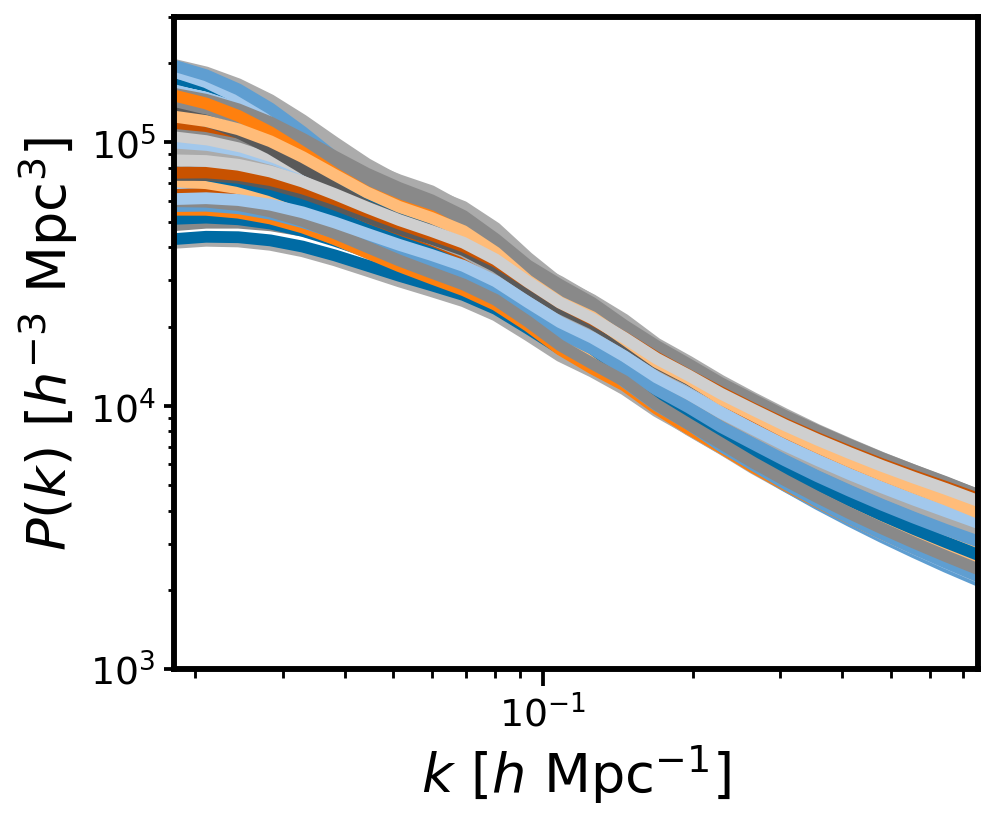

In [8]:
fig, ax = mpl.pyplot.subplots(figsize=(6, 5))
for iLH in range(n_plot):
    ax.loglog(k, Pk_noiseless[iLH])

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=23)

ax.set_xlim(np.min(k), np.max(k))
ax.set_ylim(1e3, 3e5)
mpl.pyplot.tight_layout()
mpl.pyplot.show()

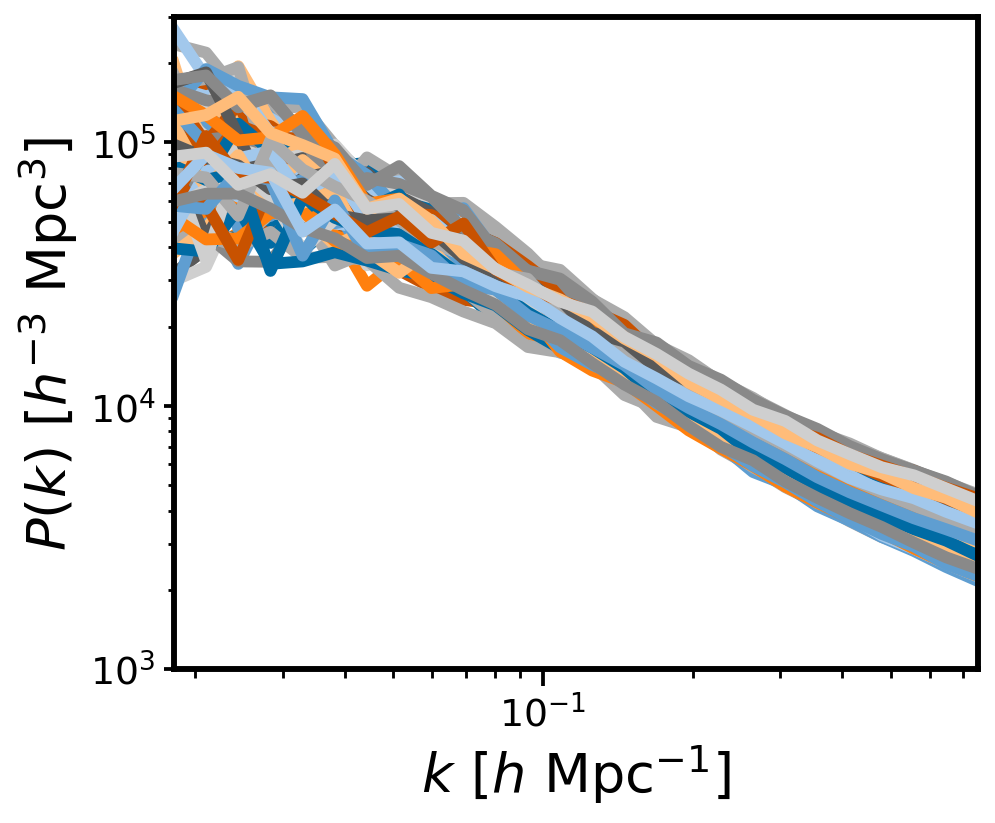

In [9]:
fig, ax = mpl.pyplot.subplots(figsize=(6, 5))
for iLH in range(n_plot):
    ax.loglog(k, Pk[iLH])

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=23)

ax.set_xlim(np.min(k), np.max(k))
ax.set_ylim(1e3, 3e5)
mpl.pyplot.tight_layout()
mpl.pyplot.show()

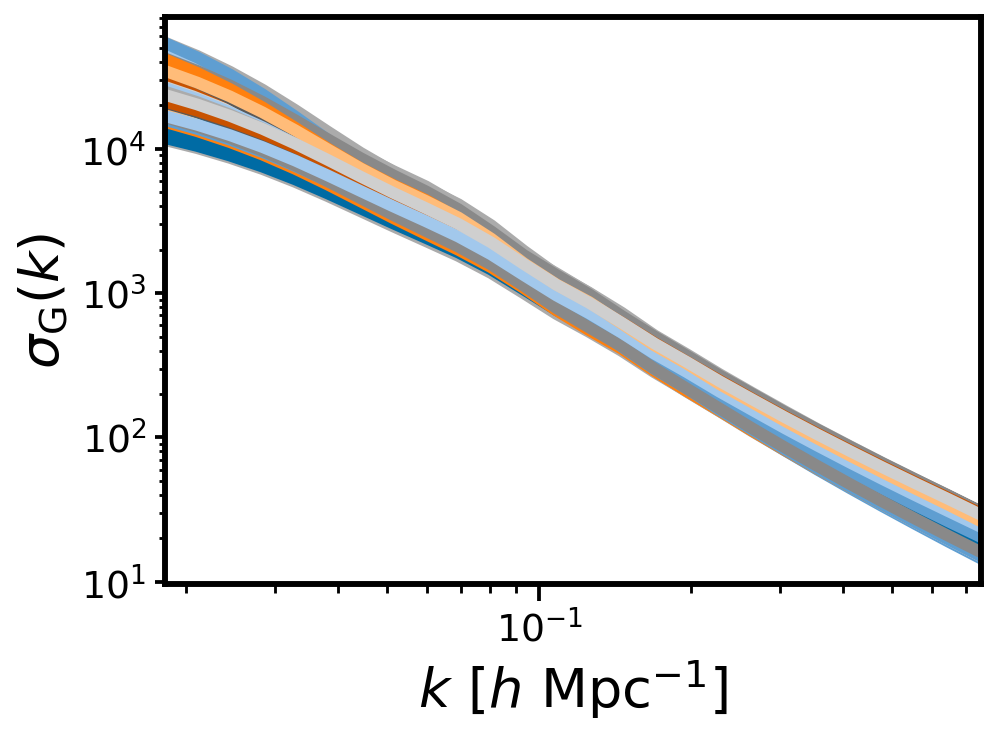

In [10]:
fig, ax = mpl.pyplot.subplots(figsize=(6, 4.5))
for iLH in range(n_plot):
    ax.loglog(k, gaussian_error_pk_noiseless[iLH])

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
# ax.set_ylabel(r'$\sigma_\text{G}(k)$', fontsize=23)
ax.set_ylabel(r'$\sigma_{\rm G}(k)$', fontsize=23)

ax.set_xlim(np.min(k), np.max(k))

mpl.pyplot.tight_layout()
mpl.pyplot.show()

# Try to infer theta!
### The goal is: given an input Pk, recover the associated theta (set of cosmological parameters).

In [11]:
import torch

from sbi.analysis import pairplot
from sbi.inference import NPE
from sbi.utils import BoxUniform
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

C:\Users\Mahlet Shiferaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Infer prior from given theta

In [12]:
for i in range(len(theta.T)):
    print(theta[:,i].min(), theta[:,i].max())

0.23006556 0.39998775
0.73008512 0.89993362
0.60004532 0.79982897
0.92007869 1.00991836
0.0400067 0.05999938


In [13]:
prior_min = [0.23, 0.73, 0.6, 0.92, 0.04]
prior_max = [0.4, 0.9, 0.8, 1.01, 0.06]
prior = BoxUniform(low=torch.tensor(prior_min), high = torch.tensor(prior_max))

In [14]:
# Check prior, return PyTorch prior.
prior, num_parameters, prior_returns_numpy = process_prior(prior)

### Separate training and test sets

In [15]:
d = int(0.9*Pk.shape[0])
x_train = torch.tensor(Pk[:d], dtype = torch.float32)
theta_train = torch.tensor(theta[:d], dtype = torch.float32)

In [16]:
x_test = torch.tensor(Pk[d:], dtype = torch.float32)
theta_test = torch.tensor(theta[d:], dtype = torch.float32)

### Instantiate the inference model using neural posterior estimation

In [17]:
from sbi.neural_nets.factory import (
    posterior_nn,
)  # For SNLE: likelihood_nn(). For SNRE: classifier_nn()

density_estimator_build_fun = posterior_nn(
    model="maf", hidden_features=256, num_transforms=4
)

In [18]:
inference = NPE(prior=prior, density_estimator = density_estimator_build_fun)

In [56]:
int(np.arange(5,51,9))

TypeError: only length-1 arrays can be converted to Python scalars

In [22]:
inference = inference.append_simulations(theta_train, x_train)

### Train the neural density estimator to build the posterior

In [43]:
density_estimator = inference.train(learning_rate=0.0004, training_batch_size = 32, validation_fraction=1/9, show_train_summary = True)

AssertionError: You have already trained this neural network. After you had trained the network, you again appended simulations with `append_simulations(theta, x)`, but you did not provide a proposal. If the new simulations are sampled from the prior, you can set `.train(..., force_first_round_loss=True`). However, if the new simulations were not sampled from the prior, you should pass the proposal, i.e. `append_simulations(theta, x, proposal)`. If your samples are not sampled from the prior and you do not pass a proposal and you set `force_first_round_loss=True`, the result of SNPE will not be the true posterior. Instead, it will be the proposal posterior, which (usually) is more narrow than the true posterior.

In [30]:
training_loss = inference._summary['training_loss']
validation_loss = inference._summary["validation_loss"]

In [32]:
np.min(validation_loss)

-15.463419596354166

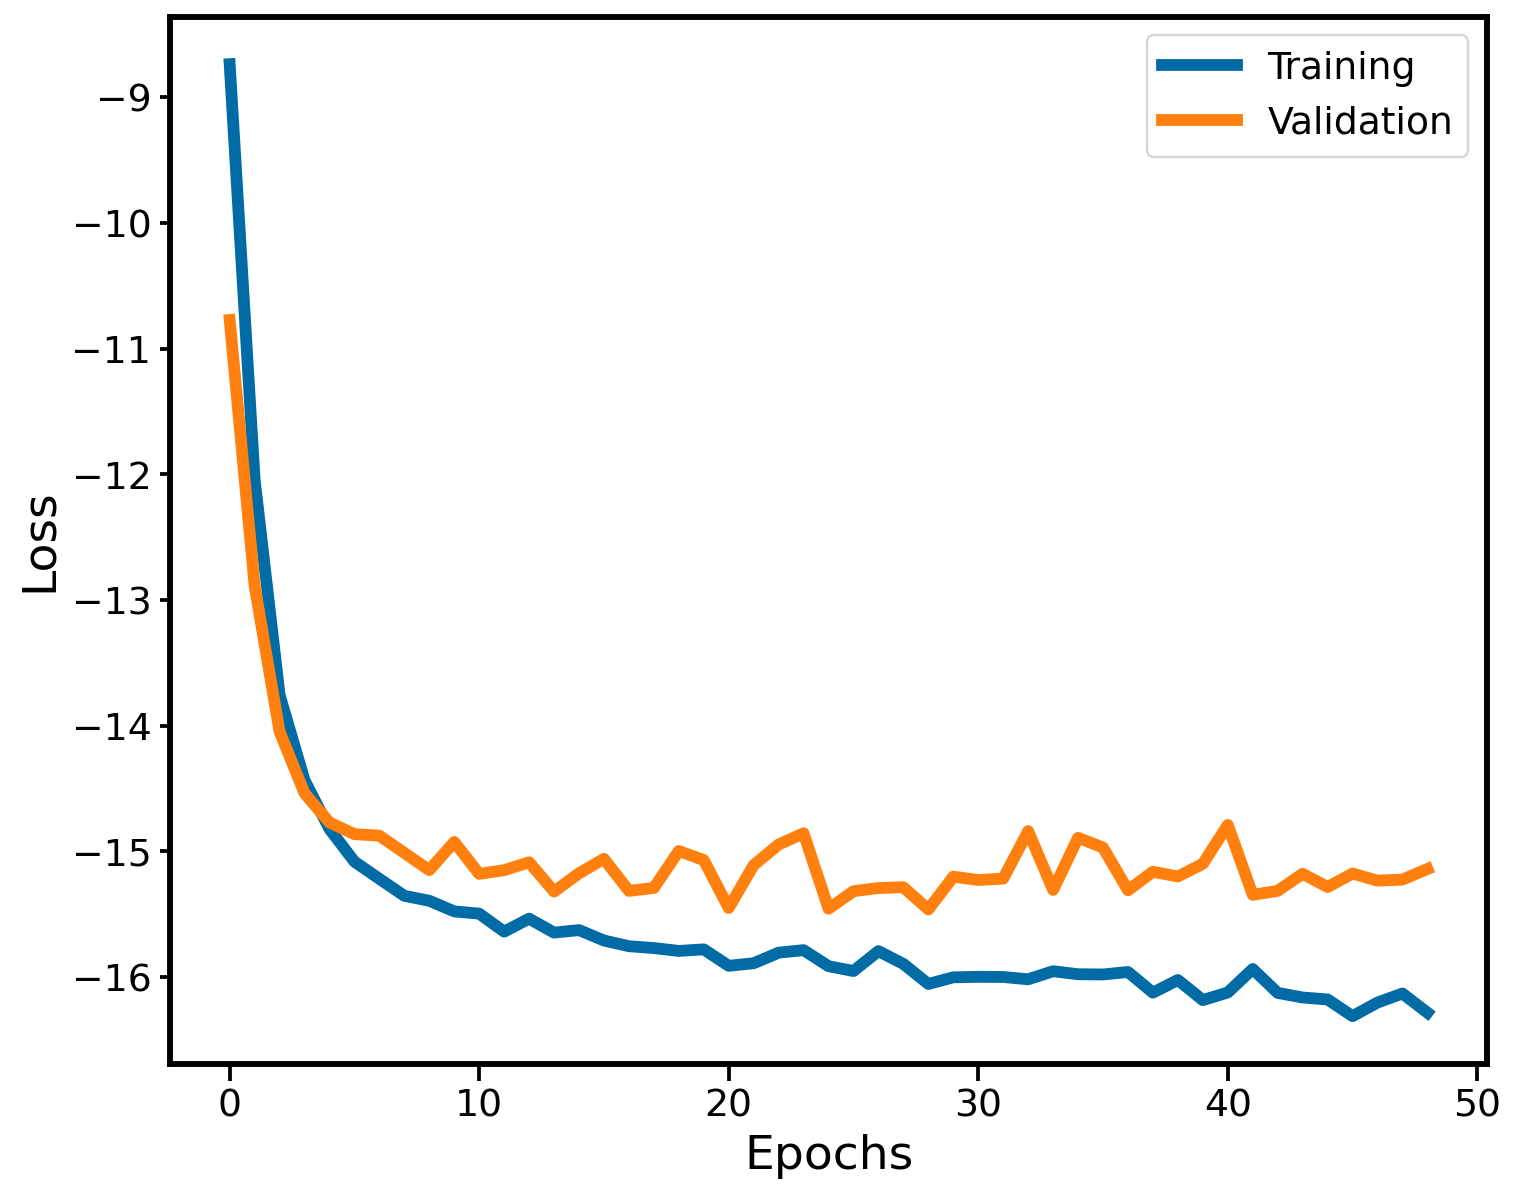

In [29]:
plt.plot(np.arange(len(training_loss)), training_loss, label = 'Training')
plt.plot(np.arange(len(training_loss)), validation_loss, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [51]:
posterior = inference.build_posterior(density_estimator)

print(posterior) # prints how the posterior was trained

Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


### Visualize the inferred posterior for a new observation


Drawing 10000 posterior samples: 11579it [00:00, 12998.55it/s]                          


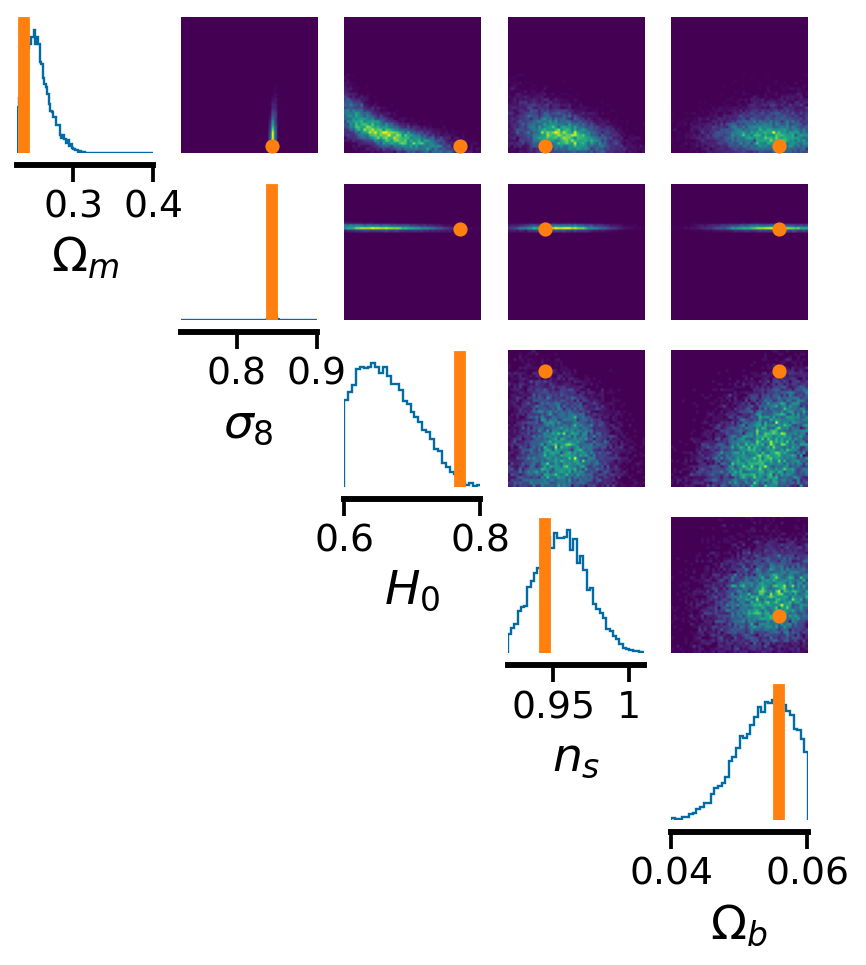

In [52]:
samples = posterior.sample((10000,), x=x_test[0])
_ = pairplot(samples,
             points=torch.tensor([list(np.array(theta_test[0]))]),
             figsize=(6, 6), limits=[[prior_min[i], prior_max[i]] for i in range(len(prior_min))],
             labels=[r"$\Omega_m$", r"$\sigma_8$", '$H_0$', '$n_s$', '$\Omega_b$'])

Drawing 10000 posterior samples: 10247it [00:01, 9903.49it/s]                           


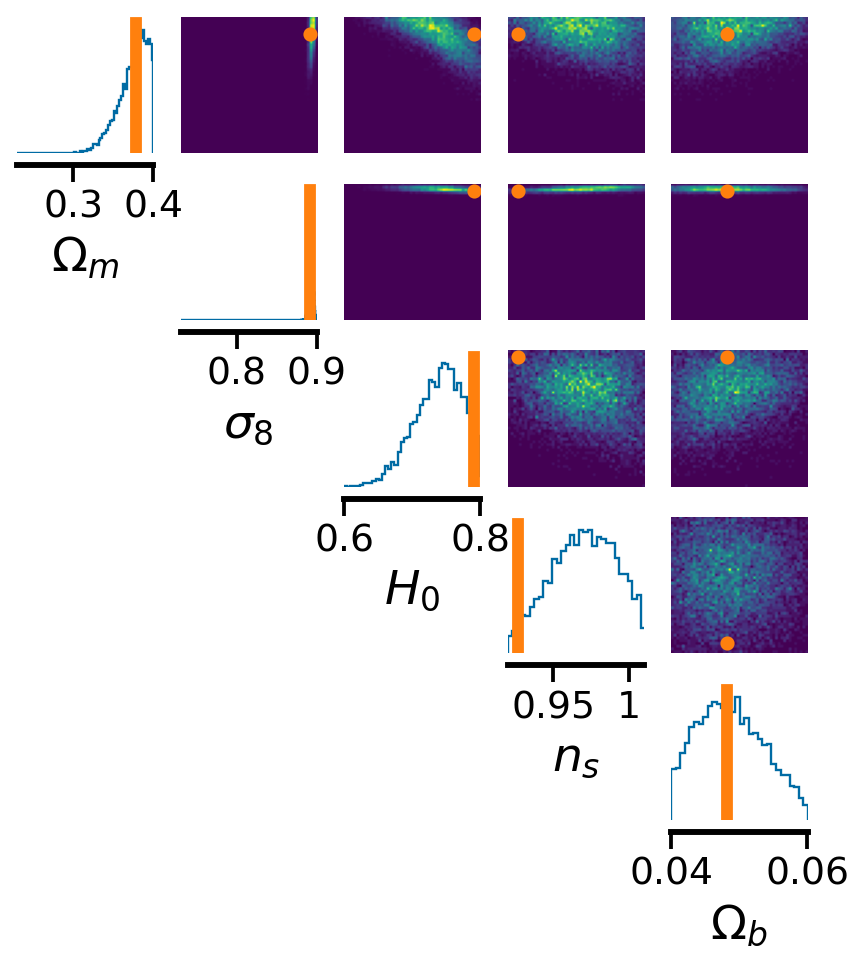

In [53]:
samples = posterior.sample((10000,), x=x_test[1])
_ = pairplot(samples,
             points=torch.tensor([list(np.array(theta_test[1]))]),
             figsize=(6, 6), limits=[[prior_min[i], prior_max[i]] for i in range(len(prior_min))],
             labels=[r"$\Omega_m$", r"$\sigma_8$", '$H_0$', '$n_s$', '$\Omega_b$'])

### Compare log-probabilities

In [54]:
# first sample an alternative parameter set from the prior
theta_diff = prior.sample((1,))

In [55]:
log_probability_true_theta = posterior.log_prob(theta_test[0], x=x_test[0])
log_probability_diff_theta = posterior.log_prob(theta_diff, x=x_test[0])
log_probability_samples = posterior.log_prob(samples, x=x_test[0])

print( r'high for true theta :', log_probability_true_theta)
print( r'low for different theta :', log_probability_diff_theta)
print( r'range of posterior samples: min:', torch.min(log_probability_samples),' max :', torch.max(log_probability_samples))

high for true theta : tensor([16.9979])
low for different theta : tensor([-889.9286])
range of posterior samples: min: tensor(-214.1015)  max : tensor(-89.9705)


# Make some summary plots
### Start with the mean

In [56]:
samples = posterior.sample_batched((10000,), x=x_test)

Drawing 10000 posterior samples: 10138it [26:17,  6.43it/s]                          


In [57]:
theta_guess = torch.mean(samples, axis = 0)
theta_delta = theta_guess-theta_test

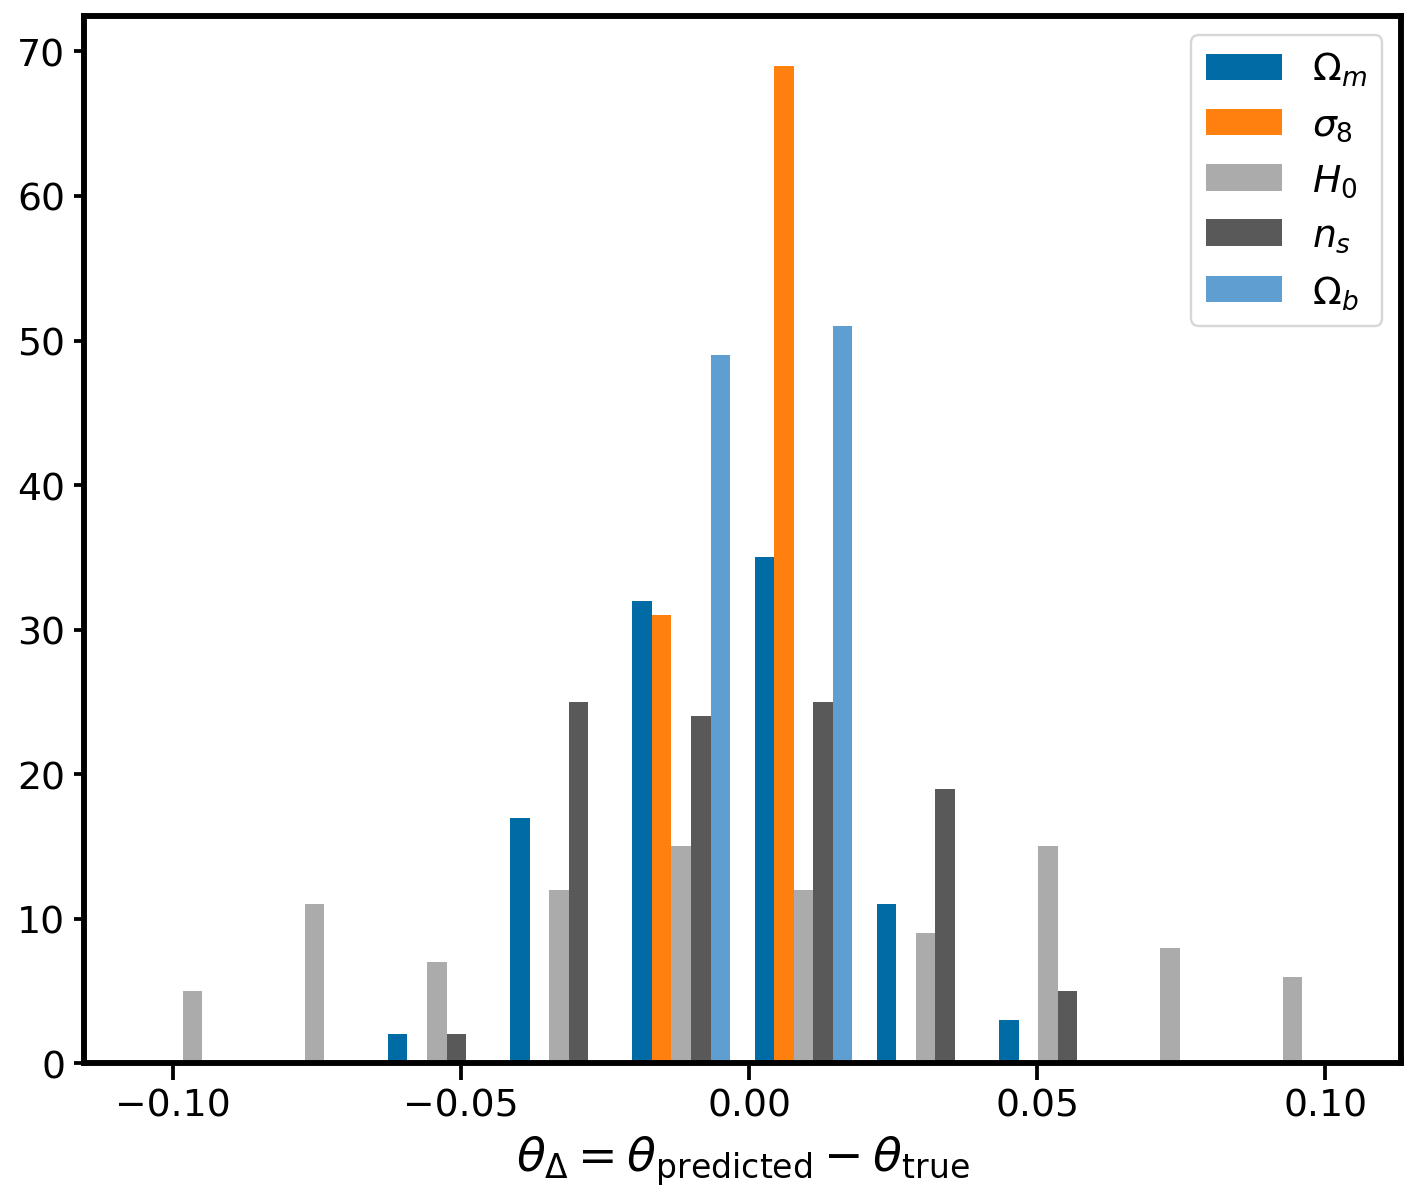

In [58]:
plt.hist(theta_delta.T, label=[r"$\Omega_m$", r"$\sigma_8$", '$H_0$', '$n_s$', '$\Omega_b$'])
plt.xlabel(r'$\theta_\Delta=\theta_\mathrm{predicted}-\theta_\mathrm{true}$')
plt.legend()
plt.show()

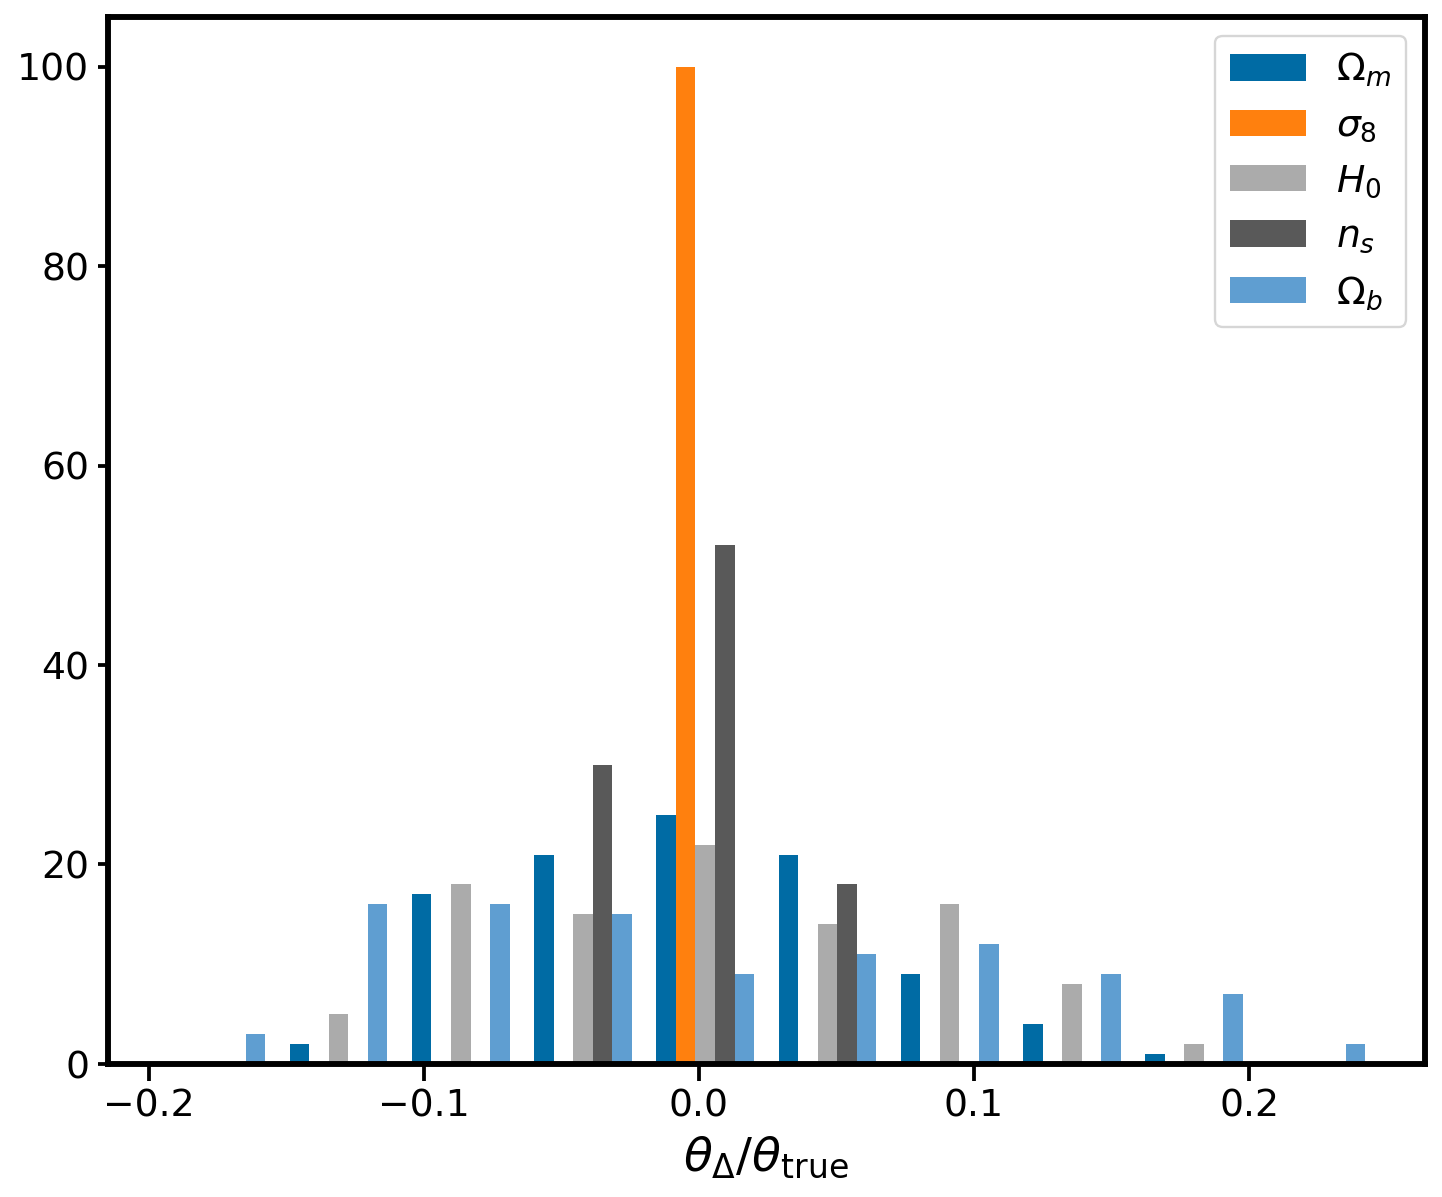

In [59]:
plt.hist(theta_delta.T/theta_test.T, label = [r"$\Omega_m$", r"$\sigma_8$", '$H_0$', '$n_s$', '$\Omega_b$'])
plt.xlabel(r'$\theta_\Delta/\theta_\mathrm{true}$')
plt.legend()
plt.show()

### Now see how the standard deviation does

In [60]:
# get the standard deviation
theta_std = torch.std(samples, axis = 0)

In [61]:
from scipy.stats import norm

In [62]:
bins = np.linspace(-4, 4, 10)
normal = norm.rvs(size = len(theta_test))

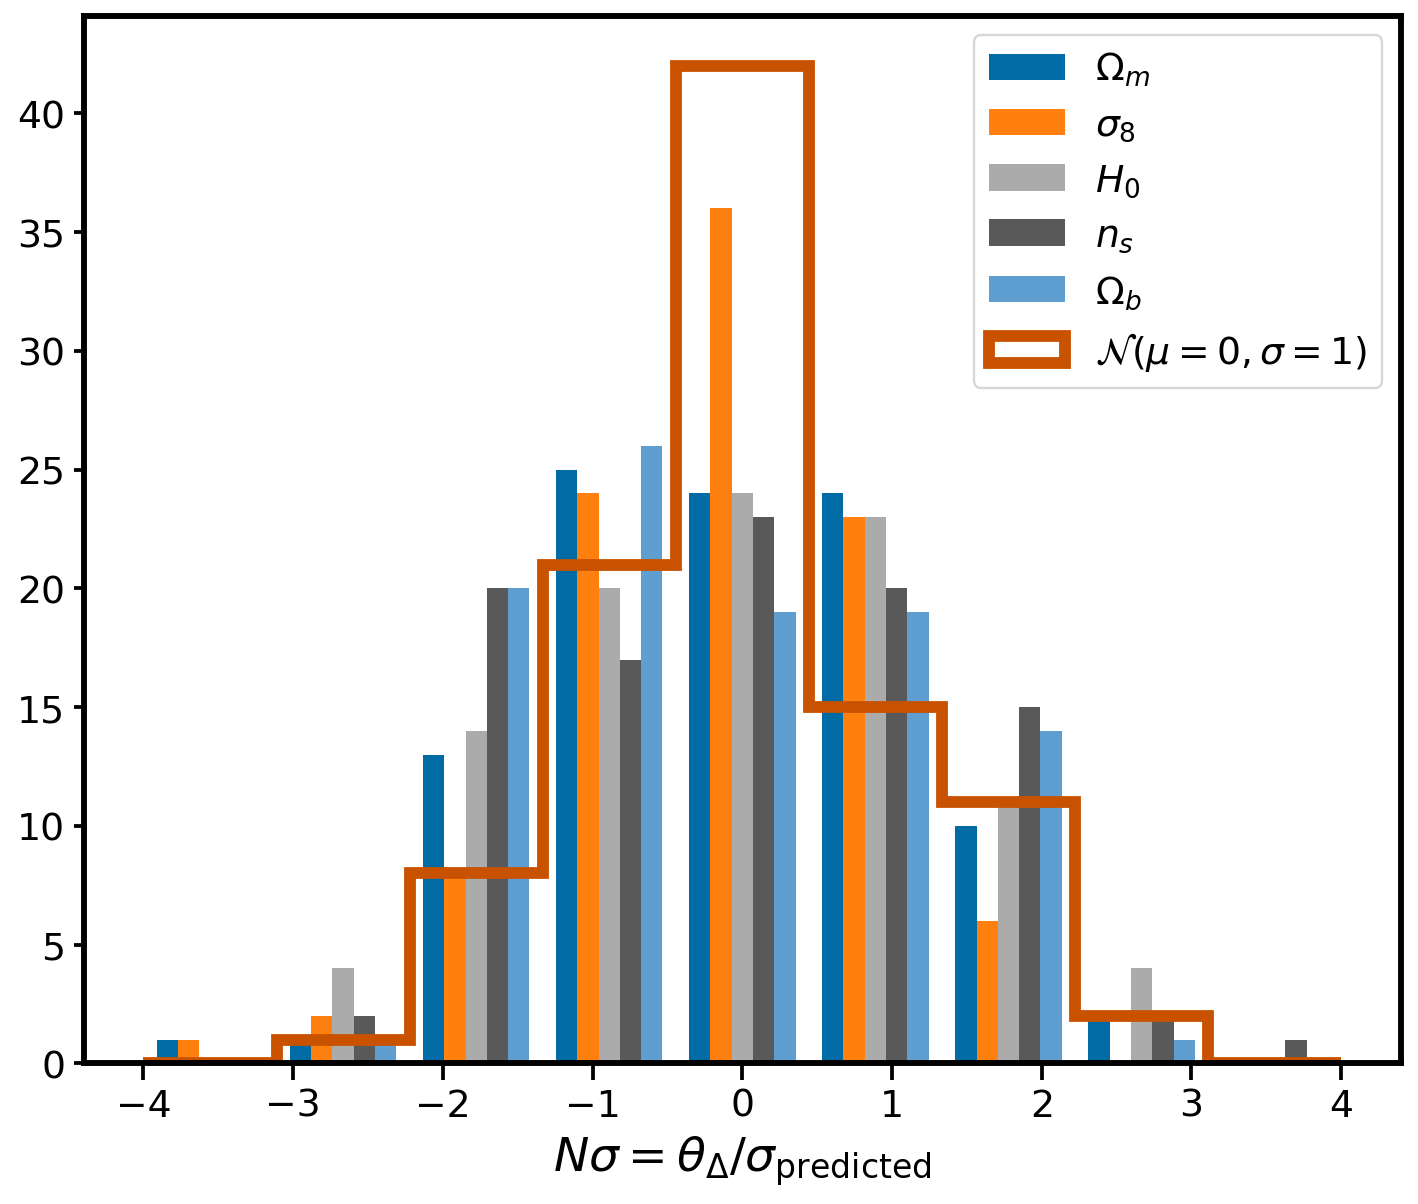

In [63]:
plt.hist(theta_delta.T/theta_std.T, bins = bins, label = [r"$\Omega_m$", r"$\sigma_8$", '$H_0$', '$n_s$', '$\Omega_b$'], histtype = 'bar')
plt.hist(normal, bins = bins, label = '$\mathcal{N}(\mu=0, \sigma=1)$', linewidth = 5, histtype = 'step')
plt.xlabel(r'$N\sigma = \theta_\Delta/\sigma_\mathrm{predicted}$')
plt.legend()
plt.show()

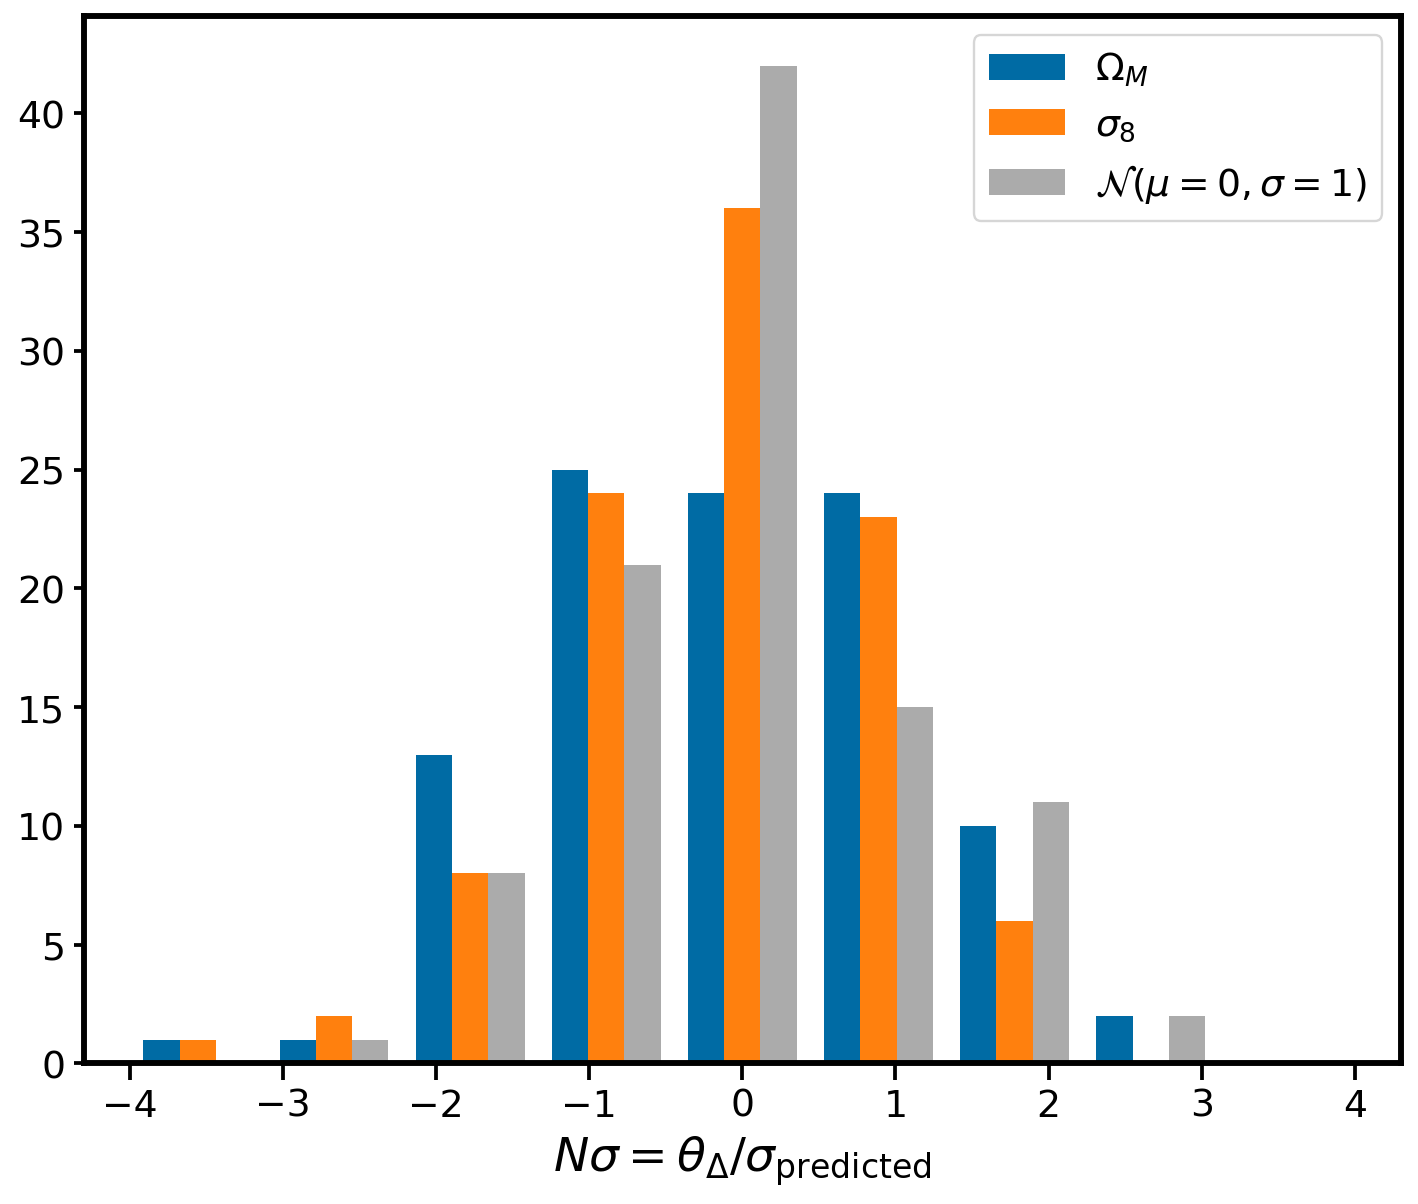

In [64]:
plt.hist([(theta_delta.T/theta_std.T)[0], (theta_delta.T/theta_std.T)[1], normal], bins = bins, label = [r"$\Omega_M$", r"$\sigma_8$", '$\mathcal{N}(\mu=0, \sigma=1)$'])
plt.xlabel(r'$N\sigma = \theta_\Delta/\sigma_\mathrm{predicted}$')
plt.legend()
plt.show()

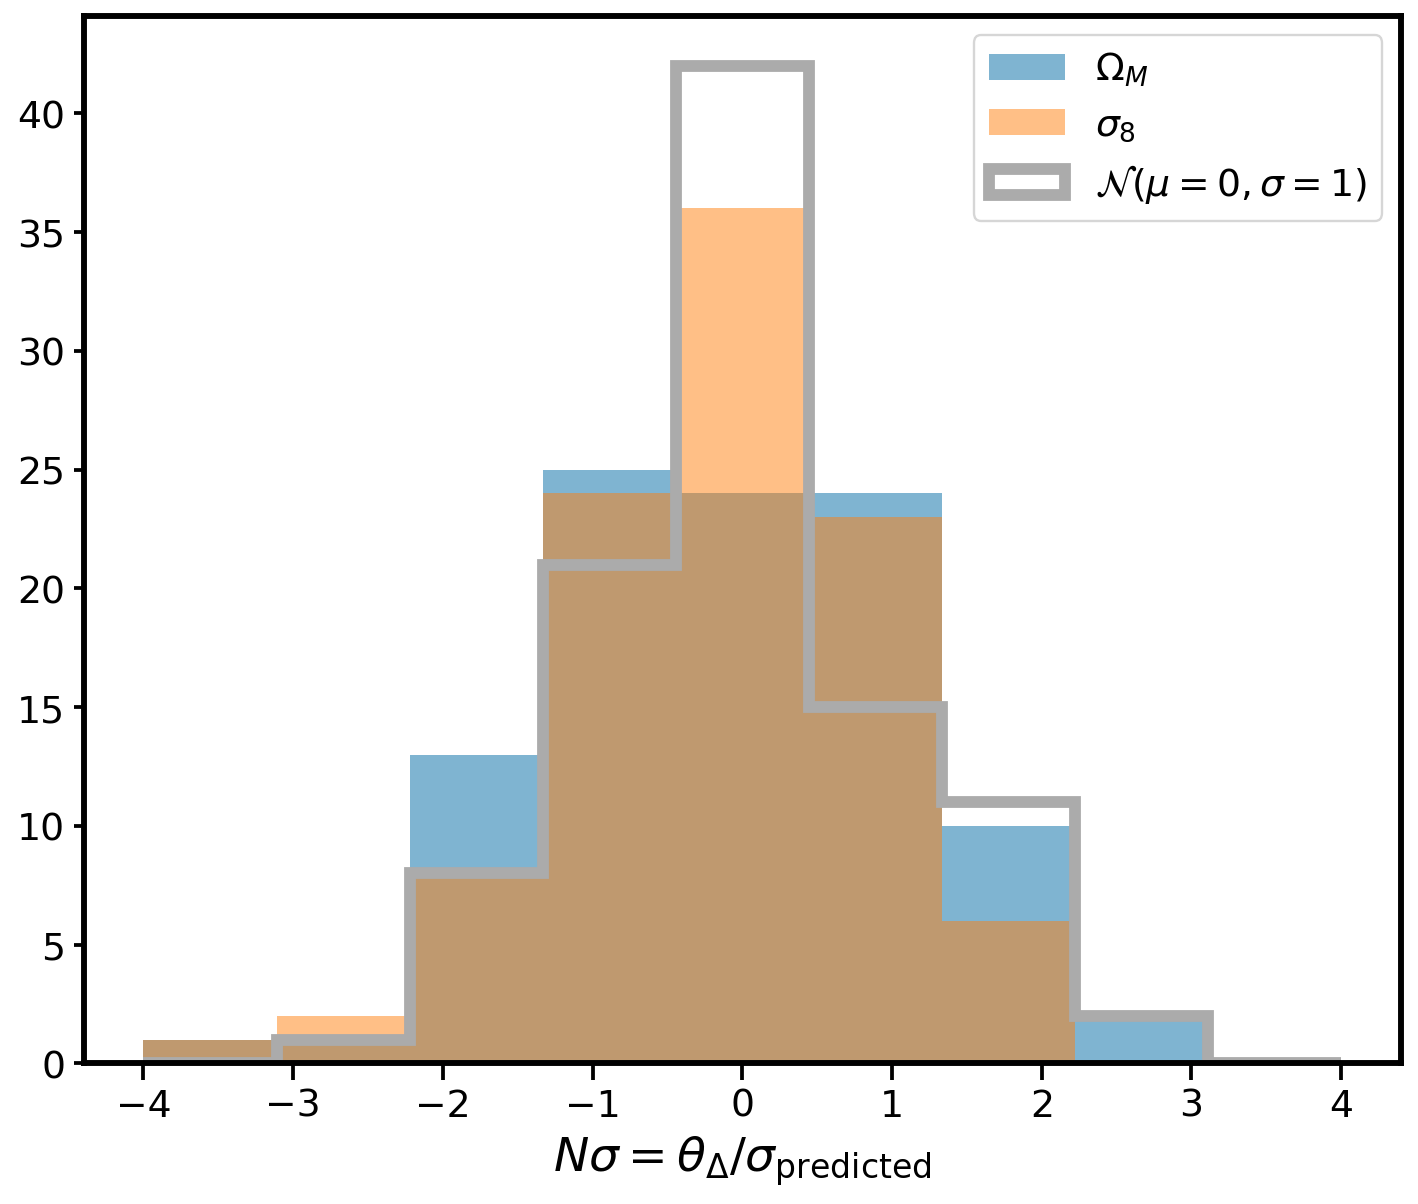

In [65]:
plt.hist((theta_delta.T/theta_std.T)[0], bins = bins, label = r"$\Omega_M$", alpha = 0.5)
plt.hist((theta_delta.T/theta_std.T)[1], bins = bins, label = r"$\sigma_8$", alpha = 0.5)
plt.hist(normal, bins = bins, label = '$\mathcal{N}(\mu=0, \sigma=1)$', linewidth = 5, histtype = 'step')
plt.xlabel(r'$N\sigma = \theta_\Delta/\sigma_\mathrm{predicted}$')
plt.legend()
plt.show()

### Plot separately

In [66]:
import matplotlib.gridspec as gridspec

In [67]:
label = [r"$\Omega_m$", r"$\sigma_8$", '$H_0$', '$n_s$', '$\Omega_b$']

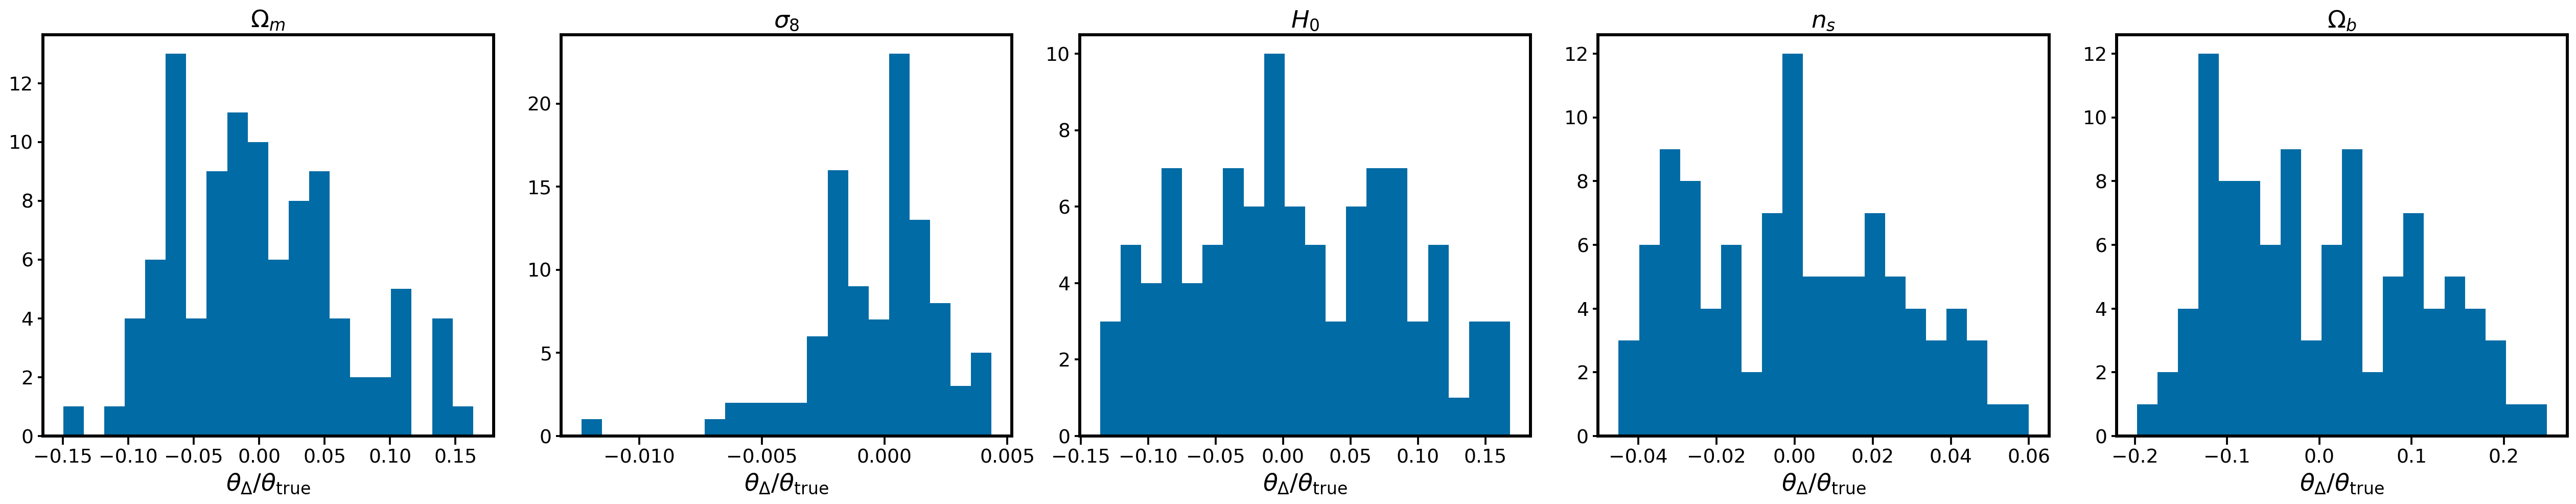

In [68]:
plt.figure(figsize = (15/2*len(label),6))
grid = gridspec.GridSpec(1,len(label))
grid.update(wspace = 0.15)
for i in range(len(theta_delta.T)):
    grid0 = plt.subplot(grid[i])
    grid0.hist(theta_delta.T[i]/theta_test.T[i], bins = 20)
    grid0.set_title(label = label[i])
    grid0.set_xlabel(r'$\theta_\Delta/\theta_\mathrm{true}$')
plt.show()

In [69]:
bins = np.linspace(-4, 4, 20)
normal = norm.pdf(bins)

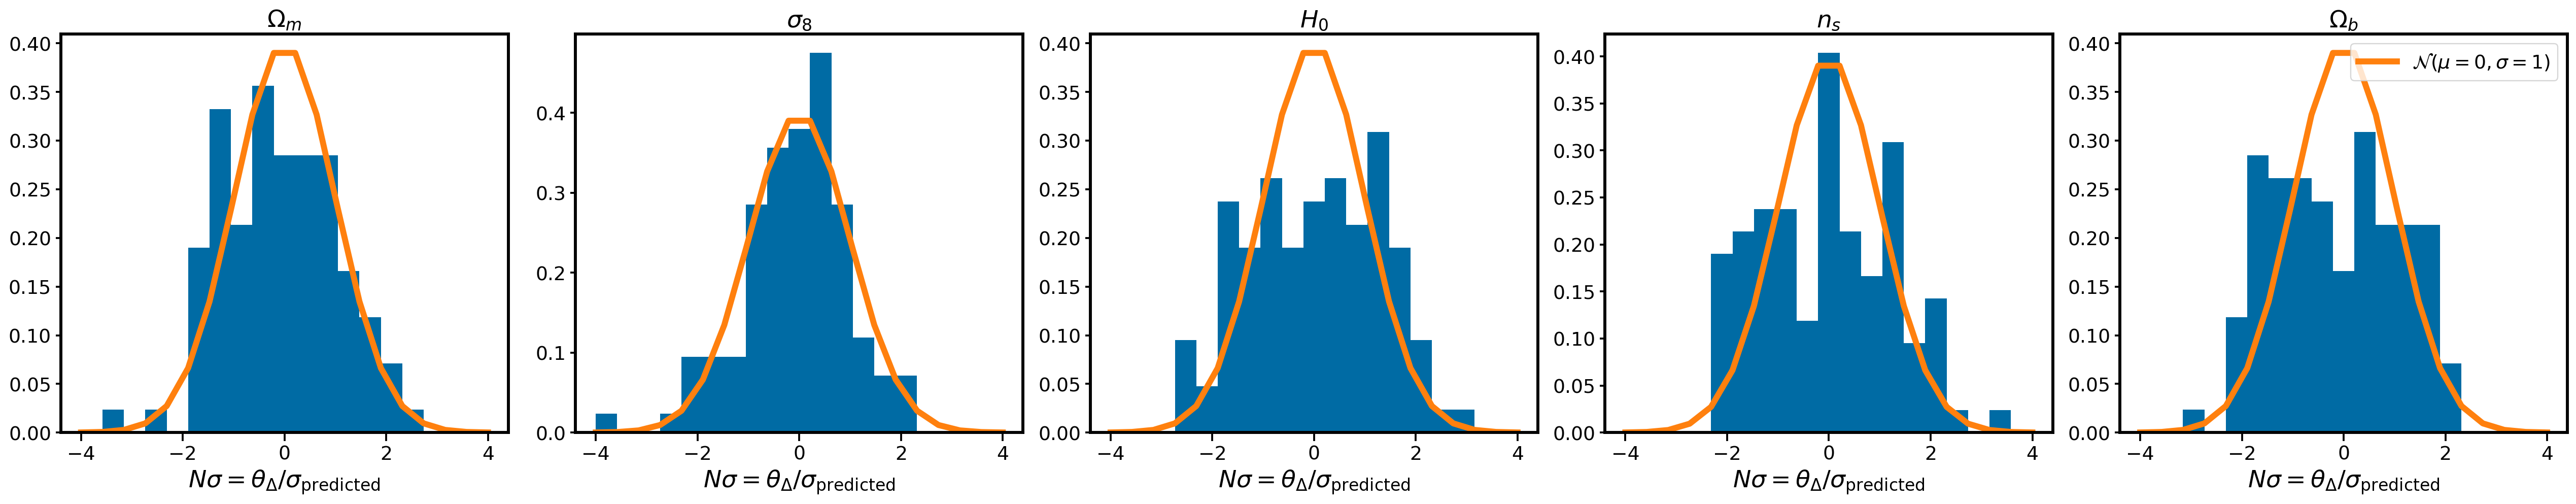

In [70]:
plt.figure(figsize = (15/2*len(label),6))
grid = gridspec.GridSpec(1,len(label))
grid.update(wspace = 0.15)
for i in range(len(theta_delta.T)):
    grid0 = plt.subplot(grid[i])
    grid0.hist(theta_delta.T[i]/theta_std.T[i], histtype = 'bar', bins = bins, density = True)
    grid0.set_title(label[i])
    grid0.plot(bins, normal, label = '$\mathcal{N}(\mu=0, \sigma=1)$', linewidth = 5)
    grid0.set_xlabel(r'$N\sigma = \theta_\Delta/\sigma_\mathrm{predicted}$')
grid0.legend()
plt.show()

Questions:
- noiseless Pk vs Pk? $\color{green}{\checkmark}$
- noiseless sigma? $\color{green}{\checkmark}$
- were emulated Pk generated with one set of params? or each generated with a sightly different one? eg am I meant to obtain just one value for theta or 10000 values for theta? --> I think I get it, Pk were emulated with theta sampled from posterior. so in the end we want to find the true set of theta? I have access to the sampled theta right? $\color{green}{\checkmark}$
- irl we would run sbi inference on real data (or simulated data that is different from training set), but rn I am just doing it on the same training/emulated data as an exercise? aka x_o = x? $\color{green}{\checkmark}$
- amortization: posterior that can be applied to many different observations without retraining vs sequential methods focus the inference on one particular observation to be more simulation-efficient... not sure I understand the significance, when would you need to retrain? --> so it's just when you train only on a small part of parameter space, instead of the whole range of priors. sequential methods may be more accurate, but amortized is fine for now $\color{green}{\checkmark}$
- don't i need priors to train inference model? $\color{green}{\checkmark}$
- will we assess the predictive performance of the posterior?
- do i train on noiseless or noisy Pk?
- mean vs map?
- so for my project: i am doing literally opposite approaches right? one is sbi, skipping over likelihood, and other is trying to work out the likelihood for 6x2 point? $\color{green}{\checkmark}$
- a way to check loss?
- what if # samples isn’t divisible by batch size? what happens to # iterations?
- stop_after_epochs vs max_num_epochs?